In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.sparse import csc_array
import scipy.sparse.linalg as spla

import matplotlib.pyplot as plt
import matplotlib as mpl

# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

from qs_mps.applications.Z2.exact_hamiltonian import *
from qs_mps.sparse_hamiltonians_and_operators import *
from qs_mps.mps_class import MPS
from qs_mps.utils import anim, get_cx, get_cy
from qs_mps.applications.ISING.utils import *

In [ ]:
model = "Z2_dual"
chi = 256
h_i, h_f = 0.6, 0.9
a = 1e-2
couplings = np.arange(h_i,h_f,a)
DMRG2 = False
N, L = 6, 30
Rs = [6,7,8]
path = "/Users/fradm/Desktop/projects/1_Z2"

In [11]:
model = "Z2_dual"
chi = 128
h_i, h_f = 0.8, 1.1
a = 1e-2
couplings = np.arange(h_i,h_f,a)
DMRG2 = False
N, L = 5, 50
Rs = [25,26,27,28,29,30]
path = "/Users/fradm/Desktop/projects/1_Z2"

In [12]:
fidelity = []
for R in Rs:
    fidelity_R = []
    for k in range(len(couplings)-1):
        print(f"R: {R}, coupling: {couplings[k]:.4f}")
        z2_lattice_g = MPS(L=L, d=2**N, model=model, chi=chi, h=couplings[k], bc='pbc')
        z2_lattice_g.Z2.add_charges(rows=get_cx(L=L,R=R),columns=[0,0])
        z2_lattice_g.charges = z2_lattice_g.Z2.charges
        z2_lattice_g.Z2._define_sector()
        z2_lattice_g_dg = MPS(L=L, d=2**N, model=model, chi=chi, h=couplings[k+1], bc='pbc')
        z2_lattice_g_dg.Z2.add_charges(rows=get_cx(L=L,R=R),columns=[0,0])
        z2_lattice_g_dg.charges = z2_lattice_g_dg.Z2.charges
        z2_lattice_g_dg.Z2._define_sector()
        
        z2_lattice_g.load_sites(path=path, precision=3, cx=get_cx(L=L,R=R),cy=[0,0])
        z2_lattice_g_dg.load_sites(path=path, precision=3, cx=get_cx(L=L,R=R),cy=[0,0])
        z2_lattice_g.ancilla_sites = z2_lattice_g_dg.sites.copy()

        fidelity_R.append(z2_lattice_g._compute_norm(site=1, mixed=True).copy())
    fidelity.append(fidelity_R)
fidelity = np.array(fidelity)

R: 25, coupling: 0.8000
[12, 37] [0, 0]
Metadata: {'L': np.int64(50), 'bc': 'pbc', 'chi': np.int64(128), 'cx': array([12, 37]), 'cy': array([0, 0]), 'h': np.float64(0.8), 'l': np.int64(5), 'model': 'Z2_dual', 'sector': '2_particle(s)_sector'}
[12, 37] [0, 0]
Metadata: {'L': np.int64(50), 'bc': 'pbc', 'chi': np.int64(128), 'cx': array([12, 37]), 'cy': array([0, 0]), 'h': np.float64(0.81), 'l': np.int64(5), 'model': 'Z2_dual', 'sector': '2_particle(s)_sector'}
R: 25, coupling: 0.8100
[12, 37] [0, 0]
Metadata: {'L': np.int64(50), 'bc': 'pbc', 'chi': np.int64(128), 'cx': array([12, 37]), 'cy': array([0, 0]), 'h': np.float64(0.81), 'l': np.int64(5), 'model': 'Z2_dual', 'sector': '2_particle(s)_sector'}
[12, 37] [0, 0]
Metadata: {'L': np.int64(50), 'bc': 'pbc', 'chi': np.int64(128), 'cx': array([12, 37]), 'cy': array([0, 0]), 'h': np.float64(0.82), 'l': np.int64(5), 'model': 'Z2_dual', 'sector': '2_particle(s)_sector'}
R: 25, coupling: 0.8200
[12, 37] [0, 0]
Metadata: {'L': np.int64(50), 'bc

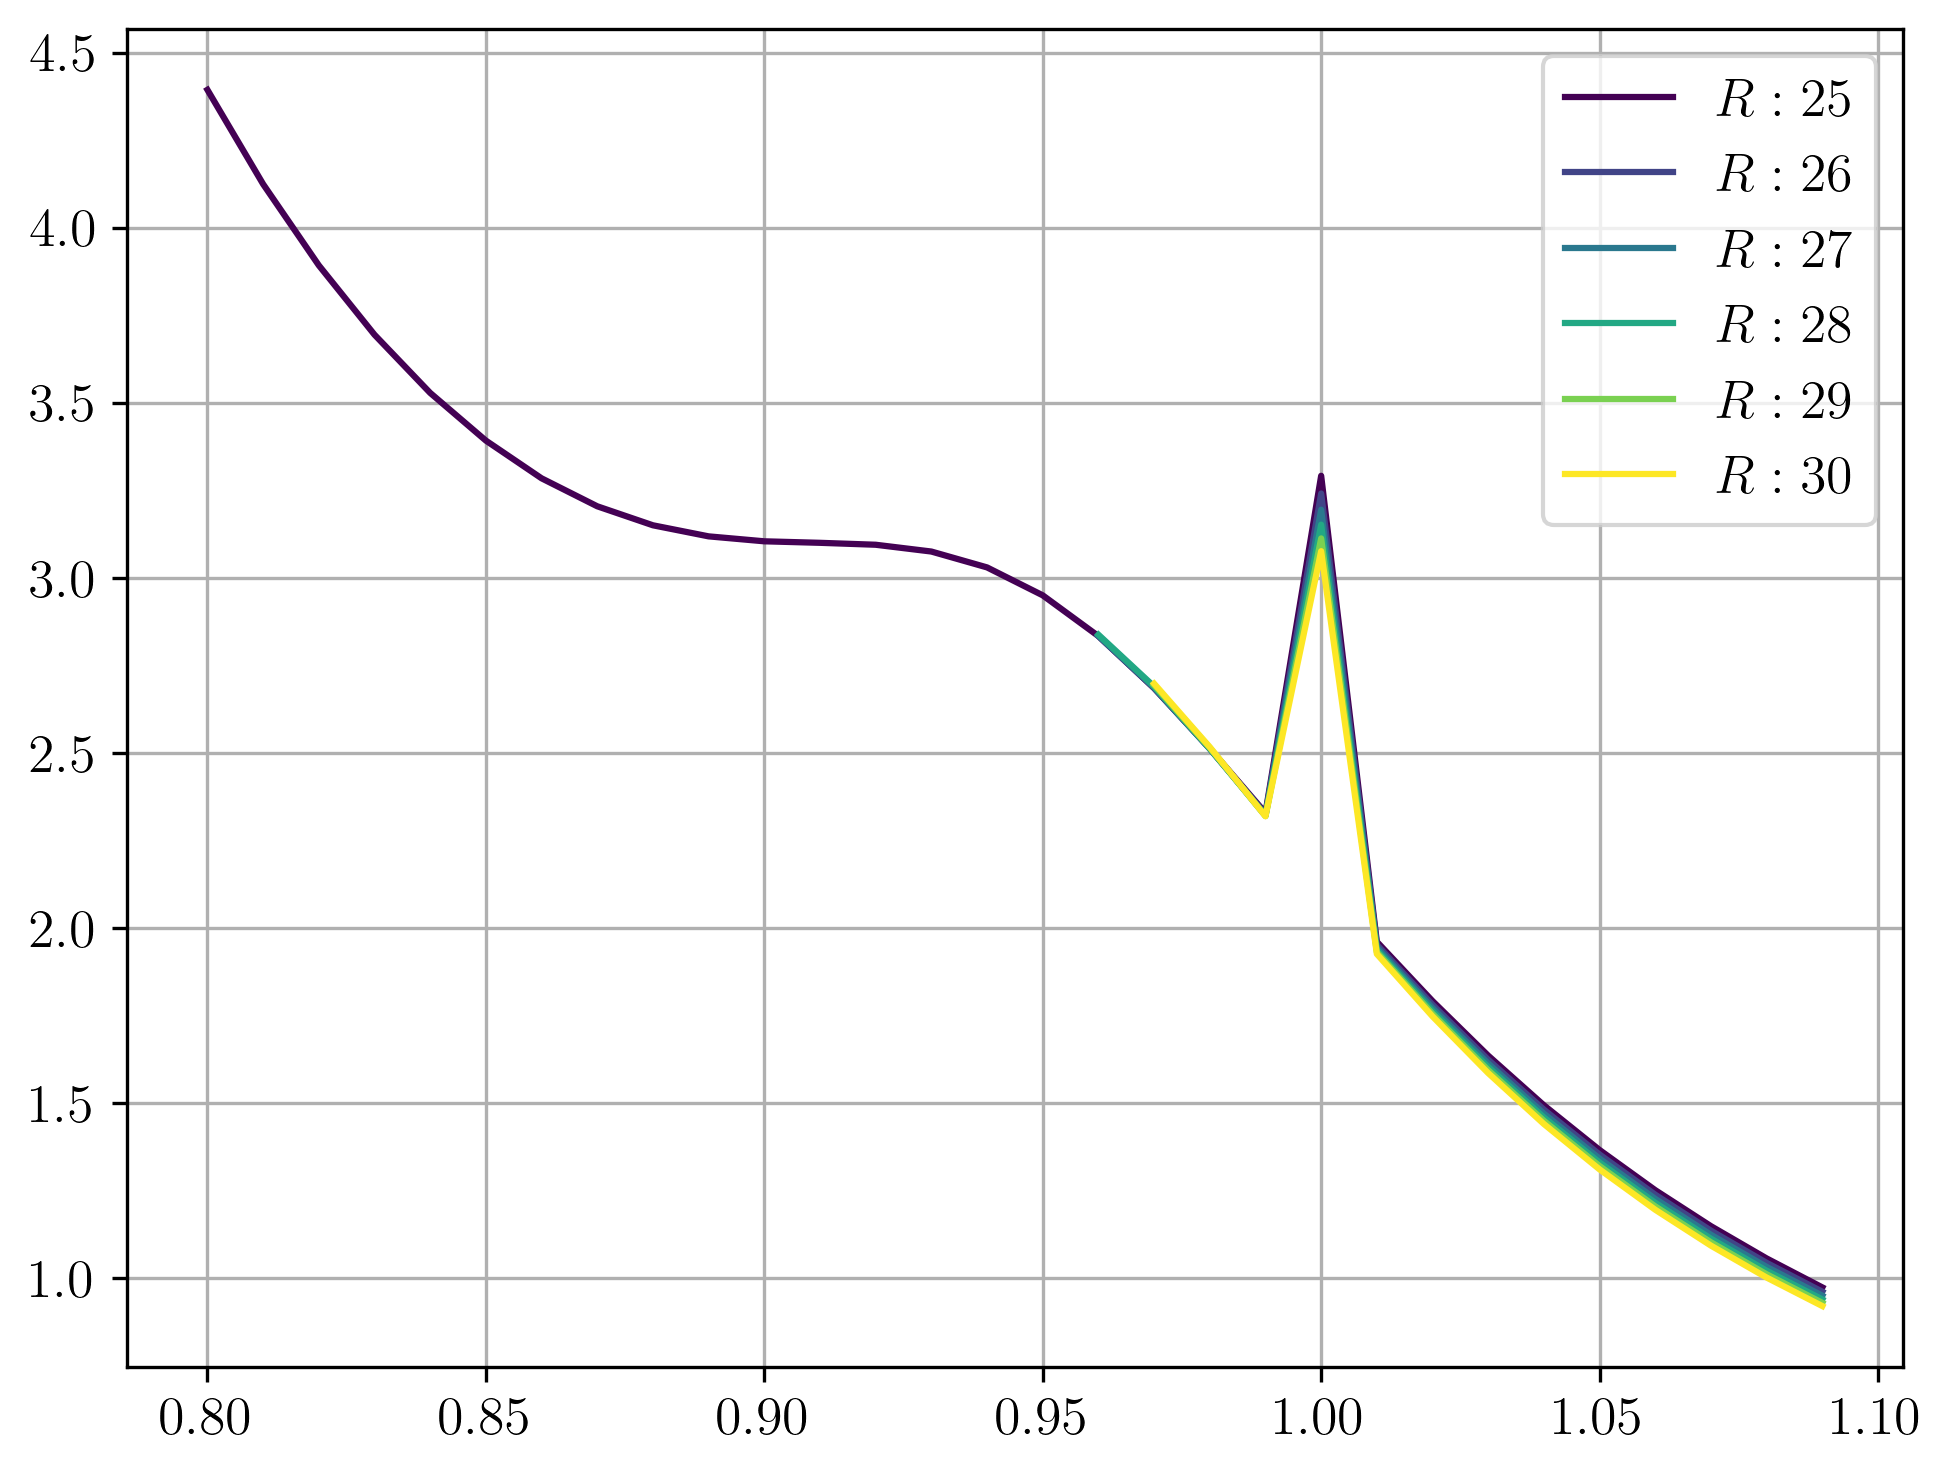

In [17]:
colors = create_sequential_colors(len(Rs))
offset = [0,0,0,0,0,0]
for i, R in enumerate(Rs):
    dfs_cut, cut = cut_fidelity_susceptibility(fid=fidelity[i,:], offset=offset[i], a=a, discr=True)
    # plt.plot(couplings[cut:-1], dfs_cut, color=colors[i], label=f"$R: {R}$")
    plt.plot(couplings[cut:-1], dfs_cut/R, color=colors[i], label=f"$R: {R}$")

plt.grid(True)
plt.legend()

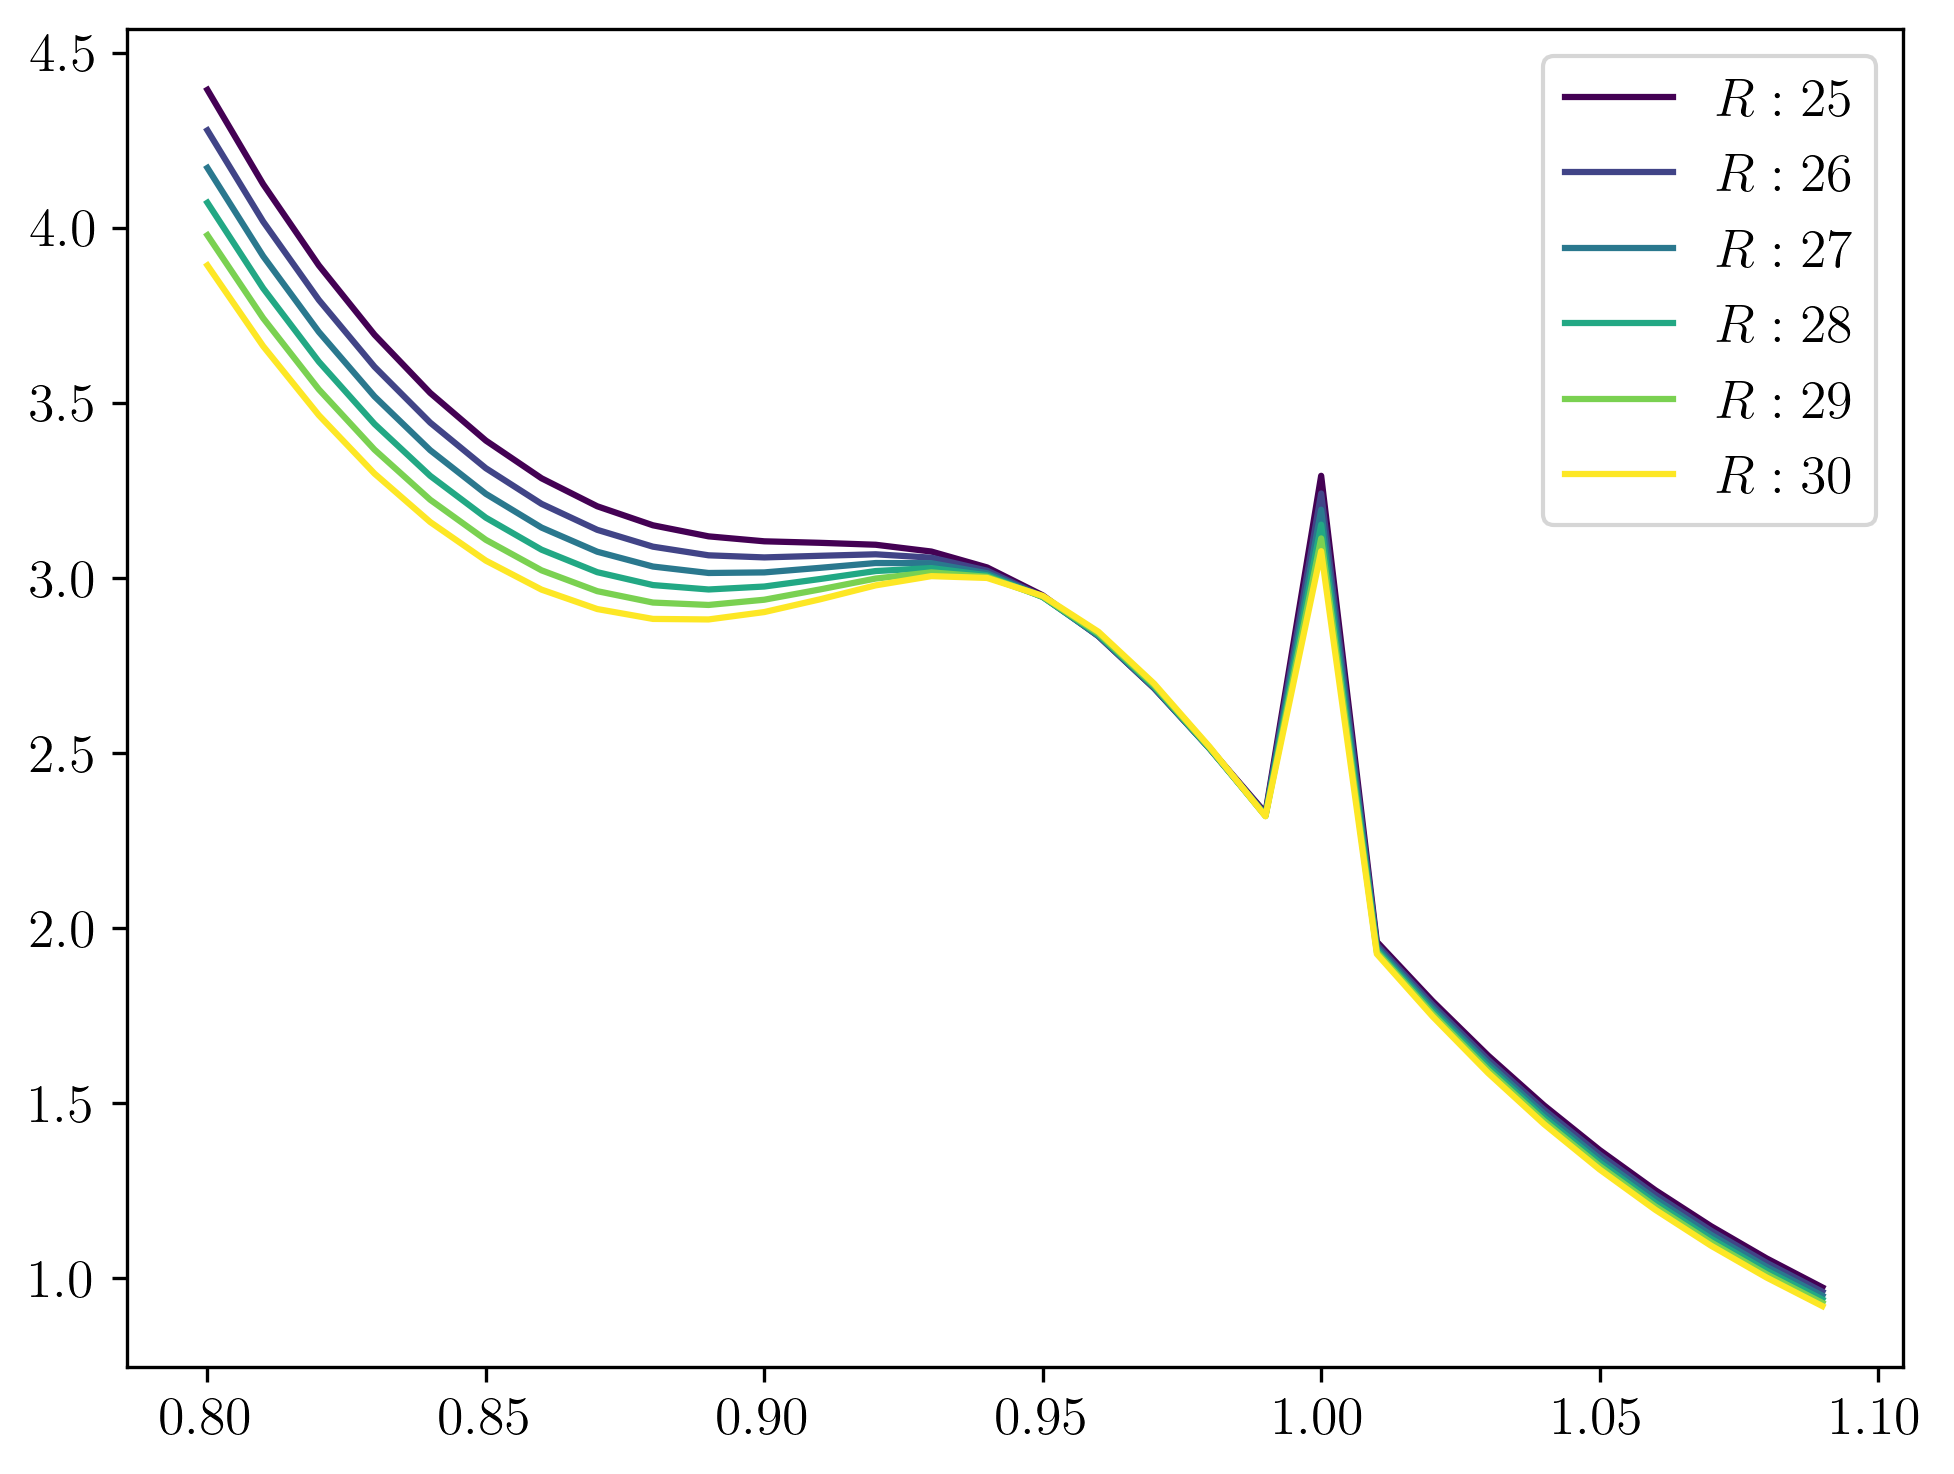

In [18]:
colors = create_sequential_colors(len(Rs))

for i, R in enumerate(Rs):
    dfs = discrete_fidelity_susceptibility(fid=fidelity[i,:], a=a)
    # plt.plot(couplings[:-1], dfs, color=colors[i], label=f"$R: {R}$")
    plt.plot(couplings[:-1], dfs/R, color=colors[i], label=f"$R: {R}$")

plt.legend()

In [ ]:
fidelity_off_axis = []
for R in Rs:
    fidelity_R = []
    for k in range(len(couplings)-1):
        print(f"R: {R}, coupling: {couplings[k]:.4f}")
        z2_lattice_g = MPS(L=L, d=2**N, model=model, chi=chi, h=couplings[k], bc='pbc')
        z2_lattice_g.Z2.add_charges(rows=get_cx(L=L,R=R),columns=[0,1])
        z2_lattice_g.charges = z2_lattice_g.Z2.charges
        z2_lattice_g.Z2._define_sector()
        z2_lattice_g_dg = MPS(L=L, d=2**N, model=model, chi=chi, h=couplings[k+1], bc='pbc')
        z2_lattice_g_dg.Z2.add_charges(rows=get_cx(L=L,R=R),columns=[0,1])
        z2_lattice_g_dg.charges = z2_lattice_g_dg.Z2.charges
        z2_lattice_g_dg.Z2._define_sector()
        
        z2_lattice_g.load_sites(path=path, precision=3, cx=get_cx(L=L,R=R),cy=[0,1])
        z2_lattice_g_dg.load_sites(path=path, precision=3, cx=get_cx(L=L,R=R),cy=[0,1])
        z2_lattice_g.ancilla_sites = z2_lattice_g_dg.sites.copy()

        fidelity_R.append(z2_lattice_g._compute_norm(site=1, mixed=True).copy())
    fidelity_off_axis.append(fidelity_R)
fidelity_off_axis = np.array(fidelity_off_axis)

R: 25, coupling: 0.8000
[12, 37] [0, 1]
Metadata: {'L': np.int64(50), 'bc': 'pbc', 'chi': np.int64(128), 'cx': array([12, 37]), 'cy': array([0, 1]), 'h': np.float64(0.8), 'l': np.int64(5), 'model': 'Z2_dual', 'sector': '2_particle(s)_sector'}
[12, 37] [0, 1]
Metadata: {'L': np.int64(50), 'bc': 'pbc', 'chi': np.int64(128), 'cx': array([12, 37]), 'cy': array([0, 1]), 'h': np.float64(0.81), 'l': np.int64(5), 'model': 'Z2_dual', 'sector': '2_particle(s)_sector'}
R: 25, coupling: 0.8100
[12, 37] [0, 1]
Metadata: {'L': np.int64(50), 'bc': 'pbc', 'chi': np.int64(128), 'cx': array([12, 37]), 'cy': array([0, 1]), 'h': np.float64(0.81), 'l': np.int64(5), 'model': 'Z2_dual', 'sector': '2_particle(s)_sector'}
[12, 37] [0, 1]
Metadata: {'L': np.int64(50), 'bc': 'pbc', 'chi': np.int64(128), 'cx': array([12, 37]), 'cy': array([0, 1]), 'h': np.float64(0.82), 'l': np.int64(5), 'model': 'Z2_dual', 'sector': '2_particle(s)_sector'}
R: 25, coupling: 0.8200
[12, 37] [0, 1]
Metadata: {'L': np.int64(50), 'bc

In [ ]:
colors = create_sequential_colors(len(Rs))

for i, R in enumerate(Rs):
    dfs = discrete_fidelity_susceptibility(fid=fidelity_off_axis[i,:], a=a)
    # plt.plot(couplings[:-1], dfs, color=colors[i], label=f"$R: {R}$")
    plt.plot(couplings[:-1], dfs/R, color=colors[i], label=f"$R: {R}$")

plt.legend()

In [ ]:
colors = create_sequential_colors(len(Rs))
offset = [10,0,0,0,0,0,0,0,0,0]
y_max = []
x_max = []
for i, R in enumerate(Rs):
    dfs_cut, cut = cut_fidelity_susceptibility(fid=fidelity[i,:], offset=offset[i], a=a, discr=True)
    y_max.append(np.max(dfs_cut))
    x_max.append(couplings[cut+np.argmax(dfs_cut)])

In [31]:
x_max, y_max

([0.9760000000000002,
  0.9810000000000002,
  0.9840000000000002,
  0.9860000000000002,
  0.9880000000000002,
  0.9890000000000002],
 [161.41791237123115,
  249.99793215618737,
  357.943534405436,
  485.14623966311456,
  631.6987741343816,
  797.442281917915])

In [ ]:
def linear_law(x, a, b):
    return a * x + b

def power_law(x, a, b, c):
    return a * (x ** b) + c

## using maxima peaks to extract the value of nu

popt, cov = curve_fit(linear_law, np.log(Rs)[0:], np.log(y_max)[0:])

a_fit = popt[0]
a_err = np.sqrt(np.diag(cov))[0]

# Calculate nu and its error
nu_fit = 2 / a_fit
nu_err = (2 / a_fit**2) * a_err


## using the pseudocritical points to extract the value of g_c

popt, cov = curve_fit(power_law, [1/R for R in Rs][0:], x_max[0:])

g_c_fit = popt[2]
g_c_err = np.sqrt(np.diag(cov))[2]

print(f"nu: {nu_fit}+/-{nu_err}")
print(f"g_c: {g_c_fit}+/-{g_c_err}")

nu: 1.0151649801622908+/-0.0008918611024329423
g_c: 0.9974964914842959+/-0.0017242000222112473


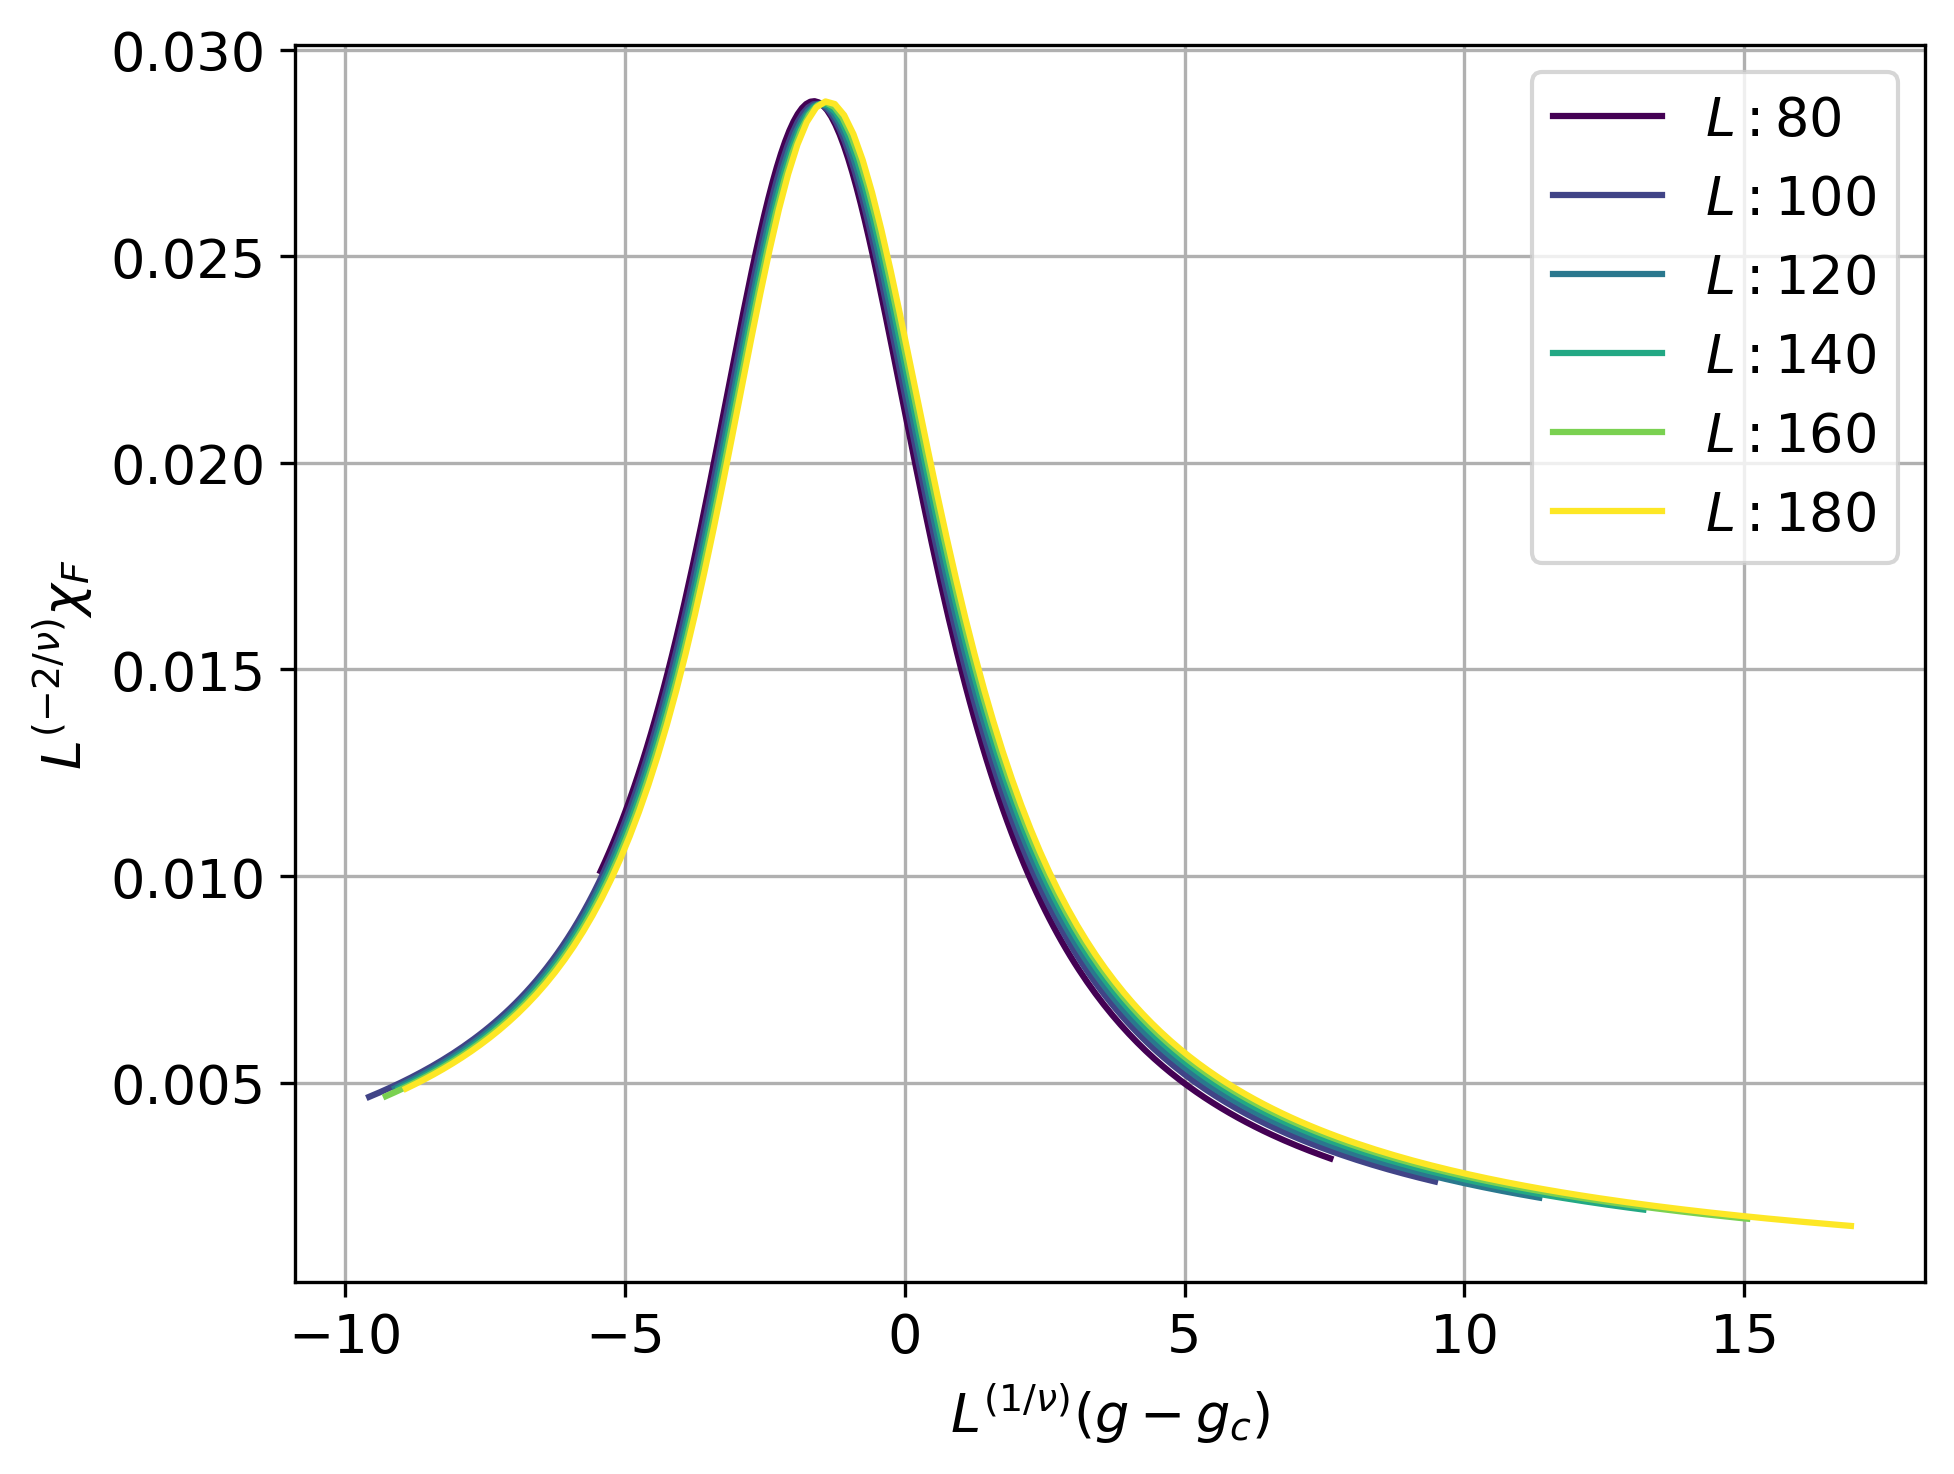

In [ ]:

colors = create_sequential_colors(len(Rs))
for i, R in enumerate(Rs):
    dfs_cut, cut = cut_fidelity_susceptibility(fid=fidelity[i,:], offset=offset[i], a=a, discr=True)
    plt.plot((couplings[cut:-1]-g_c_fit)*(R**(1/nu_fit)), dfs_cut/(R**(2/nu_fit)), color=colors[i], linestyle='-', label=f"$R: {R}$")


plt.xlabel("$R^{(1/\\nu)} (g-g_c)$")
plt.ylabel("$R^{(-2/\\nu)} \\chi_F$")
plt.grid(True)
plt.legend()